## Regression Layer 1: shapes and practical implementation of the major algorithms

In this notebook we will explore the three main regression algorithms used today - kernels, trees, and neural networks - building a fundamental intuition about each that we will build on throughout the course.   99% of nonlinear regression problems are solved using one or a combination of these algorithms.  In terms of machine learning, the goal here is to get you familiar with the shape of each regressor.  Practically speaking we want to get familiar with how to use the scikit-learn regression library - from searching documentation to common function syntax.  Together we will come to a number of important and far reaching conclusions about these fundamental machine learning algorithms.

------
This isn't a notebook you just read - you'll need to complete several coding portions of it (either individually or in groups) and think about the questions posed herein in order to build up your intuitive understanding of these algorithms, as well as your practical ability to use them via scikit-learn.  Whenever you see 'TODO' please do perform the requested task.

In other words, this is 'learning by discovery' notebook where you (either individually or in small groups) will start to build up your understanding of machine learning by doing real work and discussing it with your peers and instructors.  This is the best way to learn anything, far more effective than a book or lecture series.

## 1.  Getting started

In the investigation that follows we will use a two-dimensional toy dataset.  Real datasets - even high dimensional ones - look quite similar to this sort of dataset.  The value of using a simulated dataset at first is that we know the true underlying data-generating function we're trying to approximate (remember, this is what regression is all about).   So we can visually compare the result of regression algorithms together both in terms of how well they represent the data and - more importantly - the true underlying data-generating function itself. 

In the next few Python cells we import and plot our toy datasets, as well as their true underlying functions.  The left panel shows just the toy dataset, while the right panel shows our dataset along with the true underlying function (shown in dashed-red).

In [2]:
### in this cell we import necessary libraries for the demo
import numpy as np                  # a fundamental numerical linear algebra library
import matplotlib.pyplot as plt     # a basic plotting library
import pandas as pd                 # a basic data handling library
import sys
sys.path.append('utils')

# this line is required in order to plot in a jupyter notebook itself
%matplotlib inline       

### 1.1  Load in and plot the first (linear) dataset 

The first toy dataset is - more or less - linear in nature.  In other words, we can fit a line reasonably well to this dataset, and that line represents the underlying phenomenon quite well.

Because this is a toy dataset, we have access to the true function that generates it.  This is shown in dashed-red in the right panel below.  This dataset simulates real data in the sense that each point has some noise - that is the output value is not perfectly alligned with the underlying function from which it was generated.

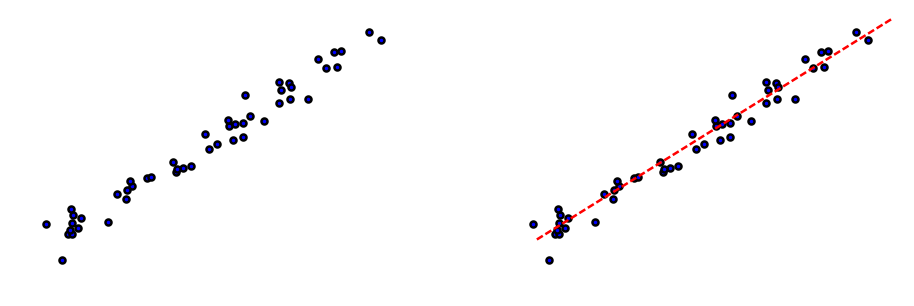

In [3]:
# load in the data and true function
data = np.asarray(pd.read_csv('datasets/regr_linear_data.csv'))
input_data_1 = data[:,0]
output_data_1 = data[:,1]

func = np.asarray(pd.read_csv('datasets/regr_linear_func.csv'))
true_x_1 = func[:,0]
true_y_1 = func[:,1]

# plot the data and true underlying data-generating function
import regression_layer_1_utils as utils  # a set of simple plotting utilities for this notebook
utils.cust_plt_util(input_data_1,output_data_1,true_x_1,true_y_1)

In [4]:
# TODO print out the dataset , see what it looks like numerically
data


array([[  2.40833453e-01,   2.49595397e-01],
       [  1.72961589e-01,   9.07801922e-02],
       [  6.14645951e-02,   3.52812322e-02],
       [  5.49415494e-01,   4.70814862e-01],
       [  2.26326317e-01,   2.33256306e-01],
       [  5.09529376e-01,   5.19744224e-01],
       [  2.35260756e-01,   2.71368812e-01],
       [  2.21632766e-01,   1.94416881e-01],
       [  4.05674575e-01,   3.40894451e-01],
       [  3.81764537e-01,   3.29698770e-01],
       [  4.42392379e-01,   4.83778009e-01],
       [  7.34230472e-02,   1.18168466e-01],
       [  9.34675782e-01,   9.07778781e-01],
       [  4.42070131e-02,  -8.01694222e-02],
       [  6.49911719e-01,   7.17182741e-01],
       [  5.20486904e-01,   4.59579292e-01],
       [  3.55306627e-01,   3.56510991e-01],
       [  6.49796778e-01,   6.21869952e-01],
       [  2.80811861e-01,   2.87941963e-01],
       [  6.81574435e-01,   6.39697350e-01],
       [  5.06759518e-01,   5.48999655e-01],
       [  5.48589349e-01,   5.35209957e-01],
       [  

TODO: After printing out the data in the above Python cell, report how many dimensions does each datapoint in this dataset have?

2

### 1.2  Load in and plot the second (nonlinear) dataset 

Next, a dataset that generated by a nonlinear phenomenon. Once again, because this is a toy dataset we have access to the true phenomenon - called a 'data generating function' - shown in dashed red in the right panel.

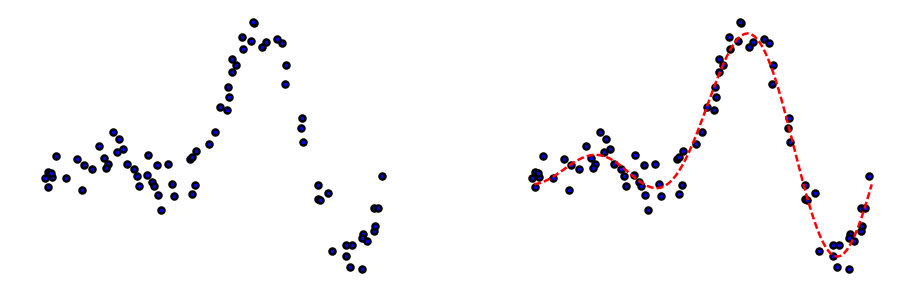

In [5]:
# load in the data and true function
data = np.asarray(pd.read_csv('datasets/regr_nonlinear_data.csv'))
input_data_2 = data[:,0]
output_data_2 = data[:,1]

func = np.asarray(pd.read_csv('datasets/regr_nonlinear_func.csv'))
true_x_2 = func[:,0]
true_y_2 = func[:,1]

# plot the data and true underlying data-generating function
import regression_layer_1_utils as utils  # a set of simple plotting utilities for this notebook
utils.cust_plt_util(input_data_2,output_data_2,true_x_2,true_y_2)

In [6]:
# TODO print out the dataset , see what it looks like numerically
data

array([[ 0.44693554,  0.01766228],
       [ 0.36548126, -0.08806218],
       [ 0.5393456 ,  0.52620581],
       [ 0.37647943, -0.24262242],
       [ 0.0243676 , -0.19007153],
       [ 0.88761091, -0.82663433],
       [ 0.24473024, -0.08298795],
       [ 0.26608504, -0.12744495],
       [ 0.88776281, -0.73706264],
       [ 0.22207075,  0.11457673],
       [ 0.99314637, -0.1809068 ],
       [ 0.53702389,  0.34461448],
       [ 0.34464507, -0.45787168],
       [ 0.55144692,  0.75612726],
       [ 0.33523534, -0.33315608],
       [ 0.01343008, -0.1484051 ],
       [ 0.56516201,  0.70893769],
       [ 0.4298586 , -0.0449974 ],
       [ 0.61762817,  1.04385243],
       [ 0.64130406,  0.85263134],
       [ 0.18783824, -0.08369936],
       [ 0.09825009, -0.04848698],
       [ 0.111081  , -0.29140774],
       [ 0.61463955,  1.0461057 ],
       [ 0.96735966, -0.43768346],
       [ 0.84601658, -0.78184738],
       [ 0.54324346,  0.44677069],
       [ 0.48377584,  0.07048643],
       [ 0.38200427,

## 2.  Try out linear regression on both datasets

Now lets fit a line to each dataset using scikit-learn's built in functionality.

First up - the linear dataset.  Activate the next Python cell to fit a linear regressor to the dataset.  This learned regressor will be shown in solid blue (with the true data generating function still shown in dashed red).

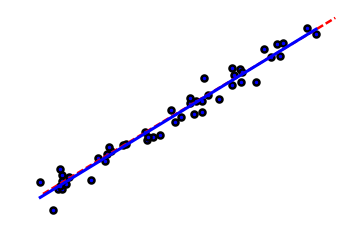

In [7]:
# import linear regression module from scikit-learn
from sklearn.linear_model import LinearRegression

# create an instance of a linear regressor from scikit learn
regressor = LinearRegression()

# fit our chosen regressor to the dataset
regressor.fit(input_data_1[:, np.newaxis], output_data_1)                              

# plot pts (in black), true function (in dashed red), and approximation (in blue)
utils.plot_approx(regressor,input_data_1,output_data_1,true_x_1,true_y_1)

Not too shabby!  The prediction matches the underlying data generating function quite well.

Now lets try the same thing with the nonlinear toy dataset.

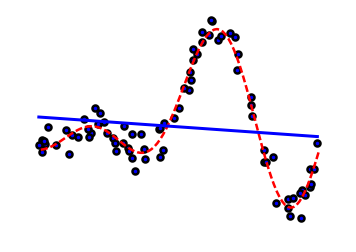

In [8]:
# import linear regression module from scikit-learn
from sklearn.linear_model import LinearRegression

# create an instance of a linear regressor from scikit learn
regressor = LinearRegression()

# fit our chosen regressor to the dataset
regressor.fit(input_data_2[:, np.newaxis], output_data_2)                              

# plot pts (in black), true function (in dashed red), and approximation (in blue)
utils.plot_approx(regressor,input_data_2,output_data_2,true_x_2,true_y_2)

Doh!  Doesn't look too good.  Thats not very surprising, since we can tell that this dataset is based on a nonlinear phenomenon, not a linear one.

That means we need to go nonlinear in order to approximate this phenomenon well.

### Note scikit-learn syntax

Note the scikit-learn syntax here - because you'll see it repeated for virtually every predictor in the scikit-learn library.

You always begin with an import statement like

*from scikit import PREDICTOR_NAME*

Then you create an instance of this object as

*regressor = PREDICTOR_NAME()*

You then fit this classifier to the dataset by saying

*regressor.fit(data_input,data_output,algorithm_parameters)*

Then to make predictions for any set of input points using the learned regressor you type

*regressor.predict(some_data_input)*

## 3.  Toying around with the fundamental nonlinear algorithms

Lets get nonlinear.

As mentioned above, the three fundamental algorithms we are investigating here are **kernels**, **trees**, and **neural networks**.  99% of all nonlinear regression problems are solved using one or a combination of these algorithms. 

### Kernel-based regressors

In the next Python cell we start off by fitting a kernel-based regressor to the dataset.  We only need a few lines to get things going here.  Play around with the value of the single parameter 'degree' and rerun the cell several times to get a sesnse of how this affects the shape of the fitted regressor and the valid values it can take.  Try to find a value for 'degree' that gives the best result - that is the closest fit to the underlying function.


TODO: Tinker around and find a value for 'degree' that gives the best result - that is the closest fit to the underlying function.

Note some machine learning jargon you will hear a ton:

- **underfitting**: this is when your choice of parameter leads to a model that is too stiff - that is not nonlinear enough - to explain your dataset well.

- **overfitting**: this is when your choice of paramter leads to a model that is too nonlinear - that wiggles around way too much - to explain your dataset wel.

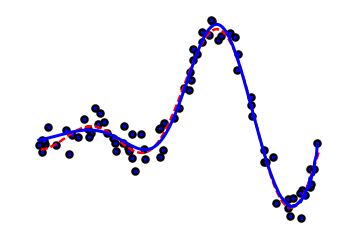

In [9]:
# KernelRidge is a kernel regressor function from the scikit-learn library
from sklearn.kernel_ridge import KernelRidge

# create an instance of a kernel-based regressor from scikit learn
regressor = KernelRidge(kernel = 'poly',degree = 48)

# fit our chosen regressor to the dataset
regressor.fit(input_data_2[:, np.newaxis], output_data_2)                              

# plot pts (in black), true function (in dashed red), and approximation (in blue)
utils.plot_approx(regressor,input_data_2,output_data_2,true_x_2,true_y_2)

### Tree-based regressors

Now, lets look at our next algorithm: a tree-based regressor.
    
The next Pyton cell will mirror the one above completely - except we will now use a tree-based algorithm instead of the kernel-based algorithm used previously.  There's only one difference: you are going to use Google to find a tree-based algorithm, and peruse its documentation and/or examples to learn about its function name and parameters.  

**TODO**

All of the regression functions in scikit-learn regression algorithms share the same syntax for declaration, fitting, and predicting.  This means all you need to do is


(1).  Google around for a tree-based regression algorithm built into scikit-learn.  You have many choices - but limit yourself to **one** of the following: decision trees, random forests, or gradient boosting.  Some good search terms for this are things like "trees + regression + scikit-learn" or "decision trees + regerssion + scikit-learn" or "random forests + regression + scikit-learn" or "boosting + regression + scikit-learn".  Each of these searches will return a documentation page for a tree-based regression algorithm built into scikit-learn.


(2).  Find its import statement.  In the previous example this was
    
    from sklearn.kernel_ridge import KernelRidge


(3).  Determine the algorithm's parameters, and define one or two when you create an instance of the algorithm.  In the previous example this was
    
    regressor = KernelRidge(kernel = 'poly',degree = 30)
  
 Here the parameters were kernel and degree.

You'll only need to adjust the first two lines of Python code in the above cell to try out a new tree-based algorithm from scikit-learn.


Once you have your tree-based algorithm, mirror what we did in the previous Python cell with our kernel-based regression: play around with the value of its parameter **max_depth** and rerun the cell to see how it affects the fit on our dataset.  If your algorithm has more than one adjustable paramter thats ok, just pick the **max_depth** parameter to play with for now.

After playing around with your **max_depth** parameter try to find a value for it that gives the best result - that is the closest fit to the underlying function.

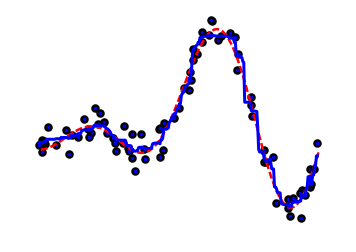

In [10]:
# TODO Import a tree based regressor algorithm from scikit-learn, and create an instance of it with a tunable parameter
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(random_state=0, n_estimators=500, max_depth = 5)

# fit our chosen regressor to the dataset
regressor.fit(input_data_2[:, np.newaxis], output_data_2)                              

# plot pts (in black), true function (in dashed red), and approximation (in blue)
utils.plot_approx(regressor,input_data_2,output_data_2,true_x_2,true_y_2)

### Neural network based regressors

Finally, lets perform the previous exercise for our final main regression algorithm: neural networks.  Find the neural network (regression) documentation page in scikit-learn and, in the next Python cell, mimic what we have done previously with kernel and tree regressors.

Try changing the single parameter called 'hidden_layer_sizes' - this takes on integer values 1,2,3,...  Just make sure you are set: solver = 'lgbfs'.  After playing around with your parameter try to find a value for it that gives the best result - that is the closest fit to the underlying function.

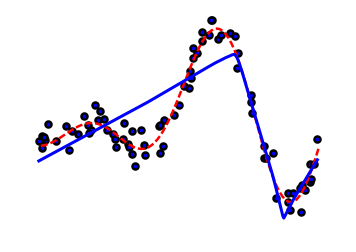

In [101]:
# TODO: Import the appropriate neural network function from scikit-learn and create an instance of it
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor(hidden_layer_sizes=350, solver = 'lbfgs')

# fit our chosen regressor to the dataset
regressor.fit(input_data_2[:, np.newaxis], output_data_2)                              

# plot pts (in black), true function (in dashed red), and approximation (in blue)
utils.plot_approx(regressor,input_data_2,output_data_2,true_x_2,true_y_2)

### Conclusions
We have seen examples of the three main algorithms used for regression: kernels, trees, and neural networks.  Time to make some conclusions.  You should discuss these points and questions with your group, feel free to add any other conclusions you and your team has as well.

(1)   Google / stack overflow is your best friend - if you want to learn how to use a given machine learning library, all you need to do is Google around and find its documentation.


(2)  The terminal (or command-line) is also your new best friend - if you can't install a machine learning library or function, you can't use it, and most libraries do not have a nice visual user interface to install it.  You need to install it from the terminal.  This involves learning just a handful of commands based on your OS.  For example - as we saw the neural network package from scikit-learn is (as of late 2016 at least) available only in the development version of scikit, and upgrading to this version requires a command line install.  How do you learn some basic terminal commands for your OS?  See (1).



(3)  Kernels, trees, and neural networks provide very different shaped fits.  When do you think one will perform better than the others in practice?  Draw out some example datasets on either pencil and paper and - if you can - try testing out your hypothesis by making a toy dataset and testing your hypothesis. 


(4) Parameter tuning.  Parameters needed to be tuned in order to provide the best fit for each algorithm type.  This was reasonably easy to do for our simple dataset, and with a single parameter.  What do we do if we have higher dimensional data - where we can't visualize the data / fit?  What if we don't just have a single parameter to tune, but 100 parameters, or 1000 parameters - how can we tune these all properly?


(5) Parameter tuning.  Pick one of your algorithms.  Is the parameter setting that gives the best fit to the undrelying data-generating function the same as the parameter value giving the best fit to the data?  How different are these settings?


(6) What other sort of percularities did you note - if any - about each of the three algorithms?  For example, when you ran a given algorithm with a fixed parameter value several times - did you always get the same result?


(7) In all of our experiments you saw the true underlying data generating function plotted in dashed red.  Indeed you want your learned regressor to match as well as possible. How do we know what a data generating function for a generic problem looks like in practice?

(3) It appears that kernels will work best when there is less curvature. Higher amounts of curvature will be better reflected through an iterative discovery process such as in random forests or neural networks.
(4) Build cost functions for the model accuracy of different parameter selections and optimize.
(5) No not necessarily. Extrapolation is a concern if a dataset is incomplete.
(6) Neural networks provided inconsistent results on a given set of parameters. It seems to be both iterative and randomized. Trees seem to just be iterative, but not randomized. Kernels seem to be non-iterative and non-randomized.
(7)You don't necessarily. The best you can do is cross validate and train for the future on prior data.